# 고객을 유지하기 위한 행동 예측하기 

[kaggle  데이터](https://www.kaggle.com/blastchar/telco-customer-churn) 

In [47]:
import pandas as pd
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import seaborn as sns

pd.set_option("display.max_columns",None) # 모든 열을 출력 

import warnings
warnings.filterwarnings("ignore")

#### 데이터 불러오기 

In [48]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* 각 고객이 가입한 서비스: 전화, 다중 회선, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리핑 TV 및 영화
* 고객 계정 정보: 고객, 계약, 결제 방법, 디지털 청구서, 월별 요금 및 총 요금
* 고객에 대한 인구 통계 정보: 성별, 연령 범위, 파트너 및 부양 가족이 있는지 여부 

In [50]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* TotalCharges 변수는 수치형 변수인데 type이 object라고 되어있음.

In [52]:
# df['TotalCharges'] = df['TotalCharges'].astype('float32')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # ValueError 무시 

In [53]:
# 수치형 변수에 대해서만 요약
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### 결측치 확인하기 

<AxesSubplot:>

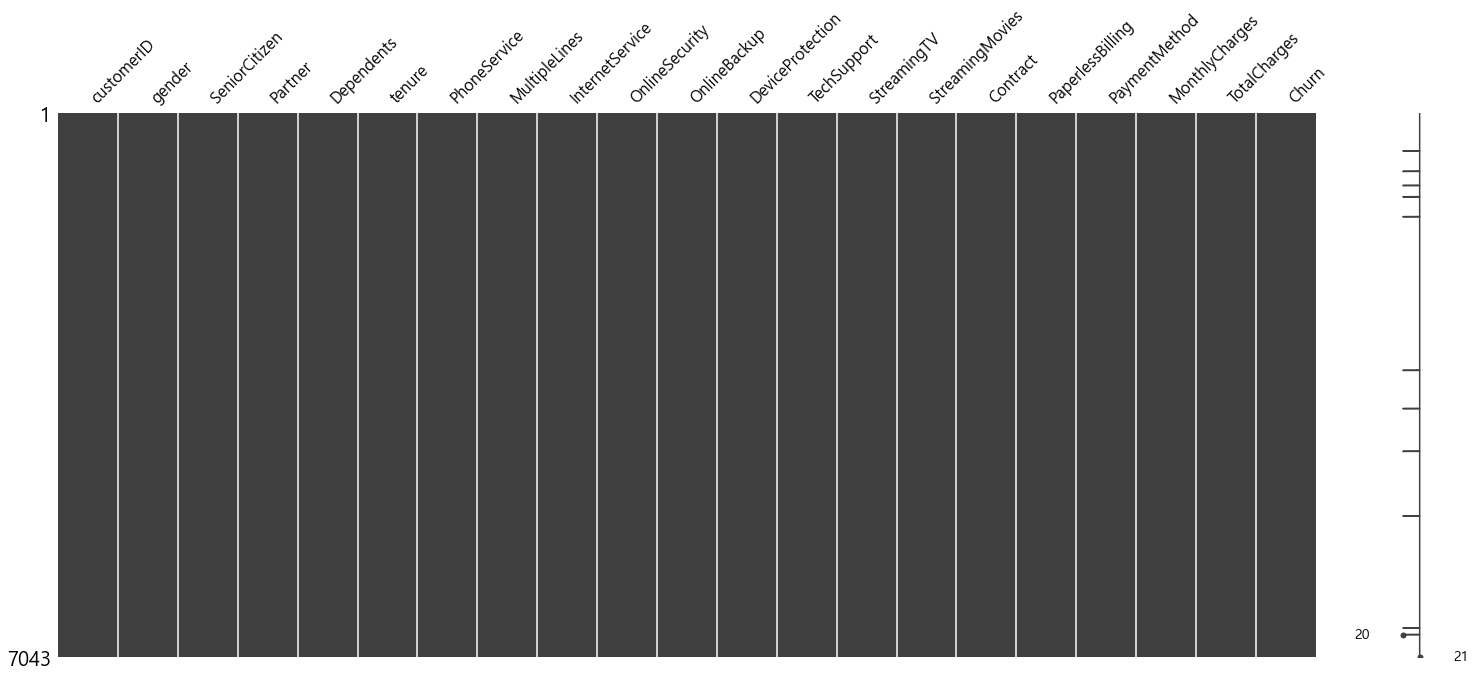

In [54]:
msno.matrix(df)

<AxesSubplot:>

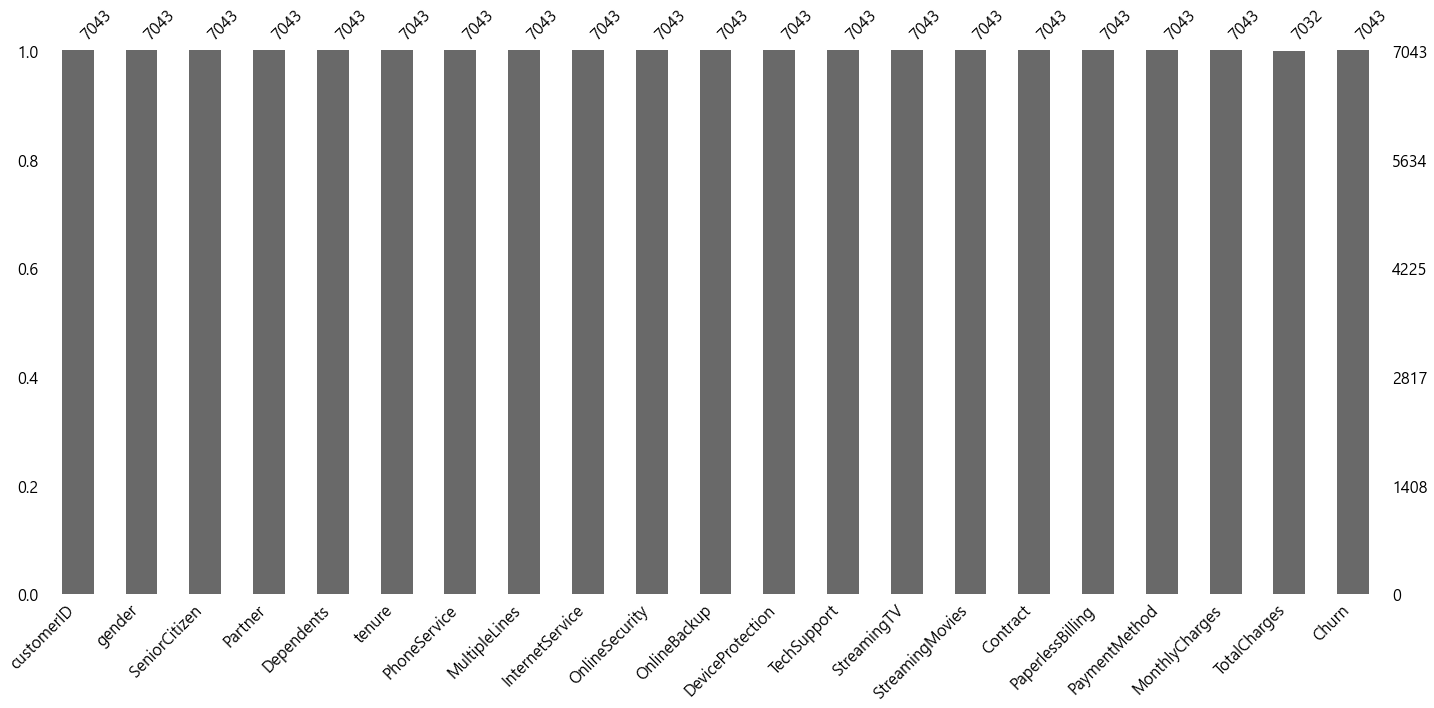

In [55]:
msno.bar(df)

In [56]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Text(0.5, 1.0, '지난 달에 떠난 고객 유무')

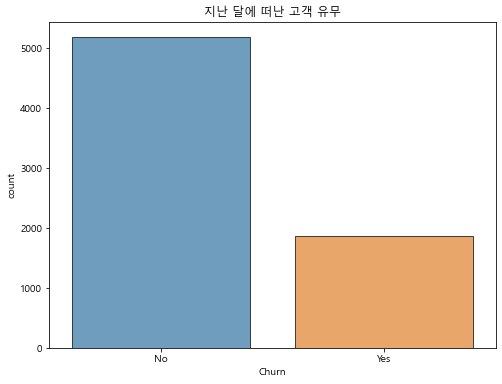

In [65]:
plt.figure(figsize = (8,6))
sns.countplot(df["Churn"], edgecolor="black",alpha=0.7)  # alpha를 이용하여 색 조정 
plt.title("지난 달에 떠난 고객 유무")

In [58]:
df = df.drop("customerID",axis = 1)

#### 범주형 변수들의 값들 확인

In [59]:
for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+ ' : '+ str(df[column].unique()))
        print (df[column].value_counts())
        print('------------------------------')

gender : ['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------
Partner : ['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------------------
Dependents : ['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------------------
PhoneService : ['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
--------------------

In [60]:
category_feature = []

for column in df.columns:
    if df[column].dtypes==object:
        category_feature.append(column)

In [61]:
print(len(category_feature))
category_feature.remove("Churn")
print(category_feature)

16
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


#### 범주형 변수에 대한 plot

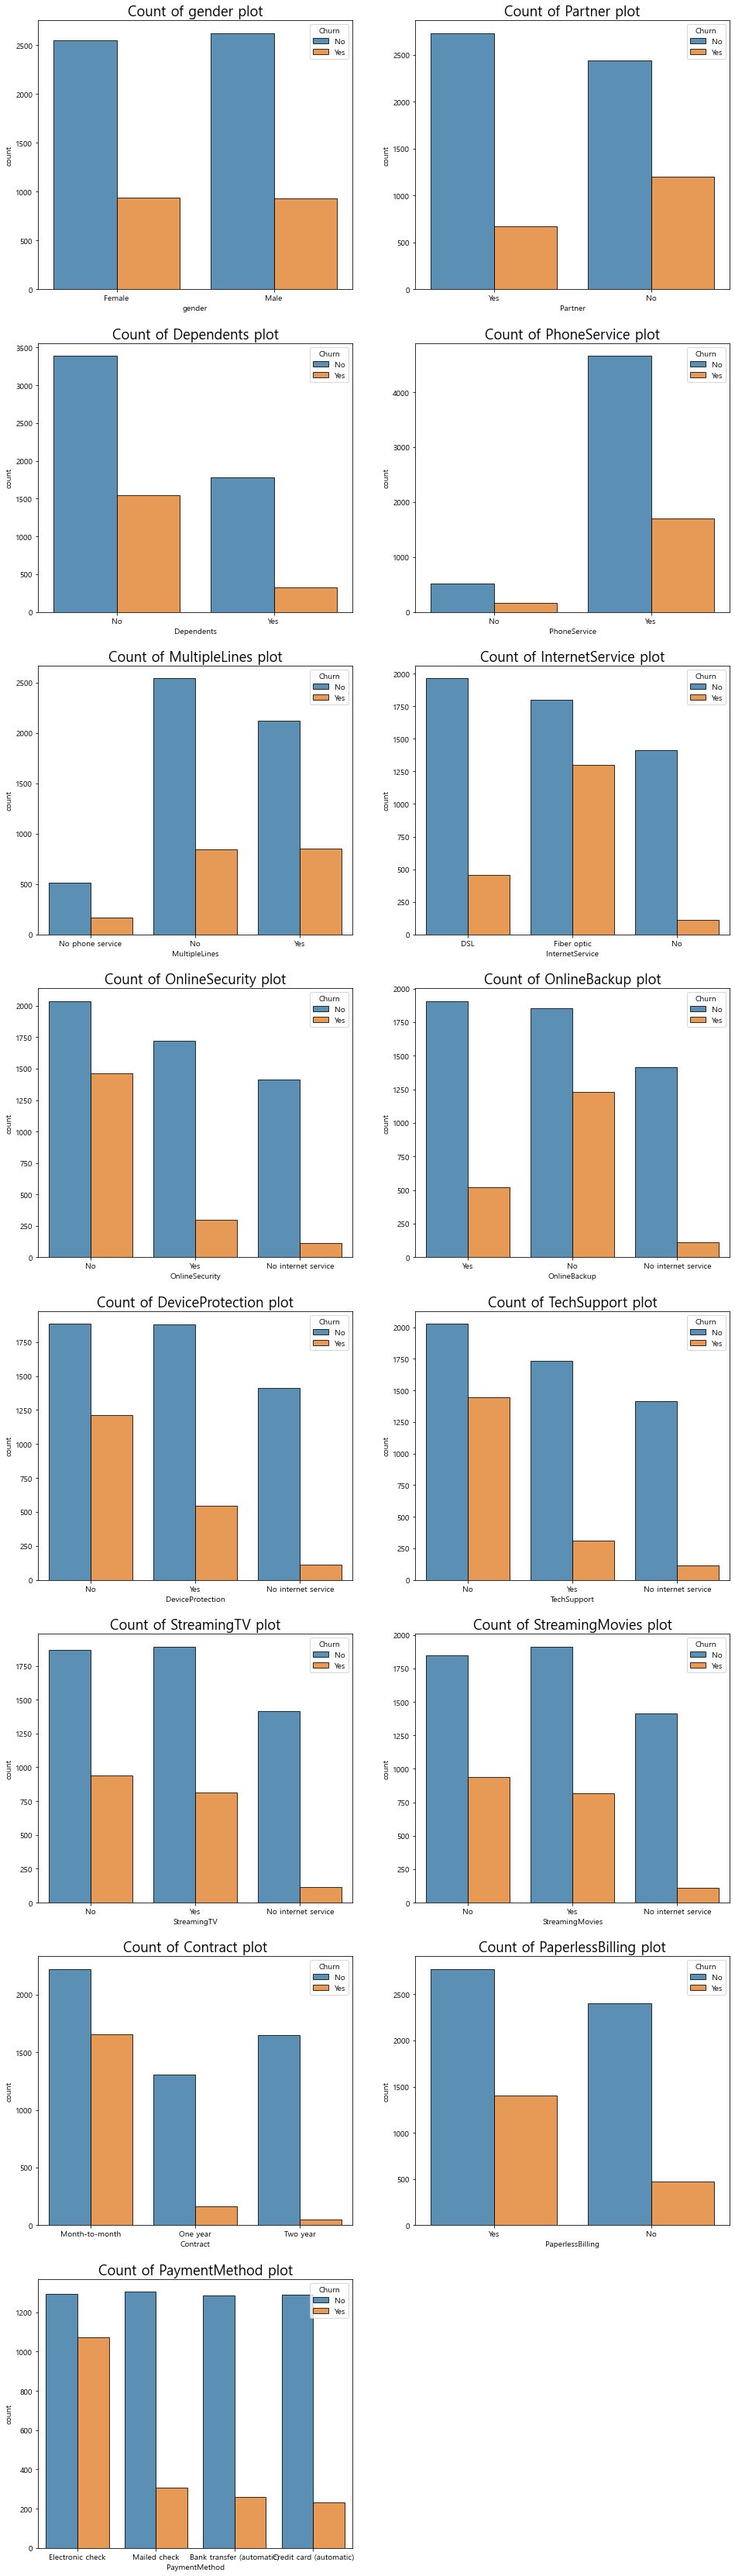

In [79]:
plt.figure(figsize=[16,60])

gs = gridspec.GridSpec(8, 2)

for i, cn in enumerate(df[category_feature]):
    ax = plt.subplot(gs[i])
    sns.countplot(df[cn], hue='Churn',data = df,edgecolor="black",alpha=0.8)
    ax.set_title("Count of "+cn+" plot", fontsize = 18)

plt.show()

#### 수치형 변수에 대한 plot

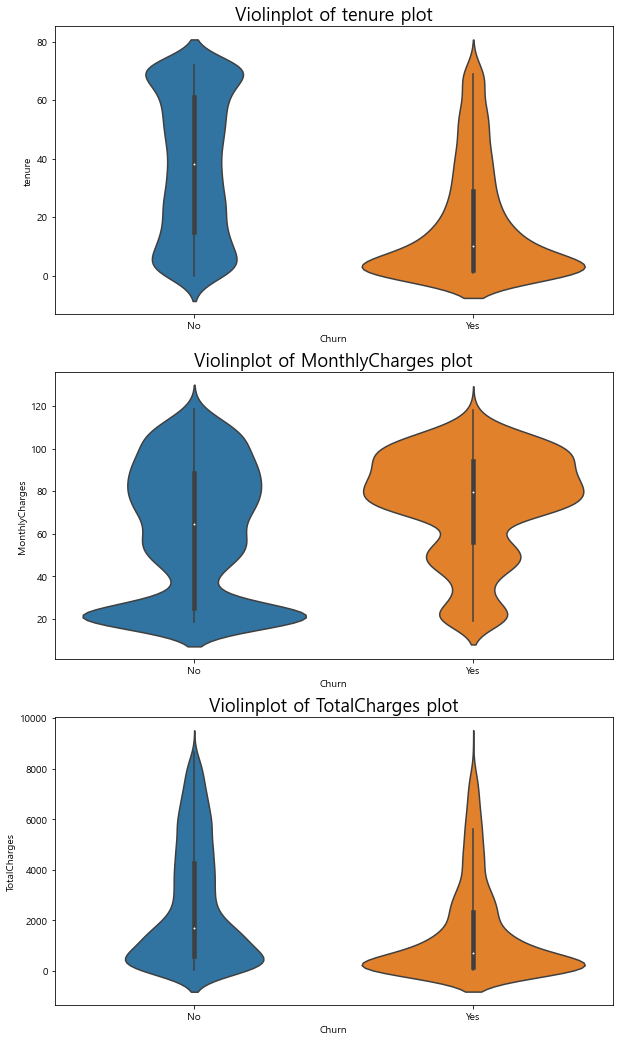

In [77]:
num_feature = ["tenure","MonthlyCharges","TotalCharges"]

plt.figure(figsize = (10,18))

gs = gridspec.GridSpec(3,1)

for i, col in enumerate(num_feature):
    ax = plt.subplot(gs[i])

    sns.violinplot(x='Churn',y=col,data=df)
    ax.set_title("Violinplot of "+col+" plot", fontsize = 18)

plt.show()

#### 시각화 해석